<p align="center">
  <img src="https://raw.githubusercontent.com/caniban/MEU_Veri_Bilimi/main/assets/Veri%20Bilimi.png" alt="https://github.com/caniban/MEU_Veri_Bilimi">
</p>

<br>

# **Encoding Egzersizleri**

Bu proje kapsamında, derste anlatılan Encoding çalışmasını pekiştirmek amacıyla çeşitli egzersizler yapılmıştır. Bu egzersizler, encoding kavramını kapsamlı ve sade bir şekilde öğrenmeyi aşılamayı hedeflemektedir. Encoding ile ilgili daha detaylı anlatımları Ünite 4 içerisindeki notebook dosyaları içerisinden inceleyebilirsiniz.

## **1. Kütüphaneleri Ekleme**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

## **2. Veriyi Yükleme ve Yorumlama**

In [ ]:
veriseti = pd.read_csv("Titanic.csv")
veriseti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. **PassengerId**: Yolcu kimlik numarası.

2. **Survived**: Yolcunun hayatta kalma durumu (0 = Hayatta kalmadı, 1 = Hayatta kaldı).

3. **Pclass**: Yolcu sınıfı (1 = 1. sınıf, 2 = 2. sınıf, 3 = 3. sınıf).

4. **Name**: Yolcunun adı.

5. **Sex**: Yolcunun cinsiyeti.

6. **Age**: Yolcunun yaşı.

7. **SibSp**: Yolcunun gemide bulunan eş veya kardeş sayısı.

8. **Parch**: Yolcunun gemide bulunan ebeveyn veya çocuk sayısı.

9. **Ticket**: Bilet numarası.

10. **Fare**: Yolcu tarafından ödenen bilet ücreti.

11. **Cabin**: Yolcunun kabin numarası.

12. **Embarked**: Yolcunun gemiye bindiği limanın kısaltması (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
veriseti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
veriseti['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
veriseti['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Veri setindeki cinsiyet `['Sex']` sütununun sadece erkeklerden ve kadınlardan **(male, female)** oluştuğunu görmekteyiz. Dolayısıyla, bu kategorik veriyi nümerik hale dönüştürmek istiyoruz.

## **3. Encoding**

In [ ]:
# from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

In [ ]:
np.unique(veriseti["Sex"])

array(['female', 'male'], dtype=object)

In [ ]:
veriseti["Sex_encoded"] = labelencoder.fit_transform(veriseti["Sex"])
veriseti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<hr>

In [ ]:
#@markdown Sizce dönüşüm yapıldıktan sonra orijinal `Sex` sütununu ne yapabiliriz? Farkı görebiliyor musunuz?

#@markdown

#@markdown **Kodu göster** butonuna tıklayarak ne yapıldığını kod halinde görebilirsiniz!

veriseti = veriseti.drop('Sex', axis=1)
veriseti.head()

<br>
<hr>

<br>

Tekrarlanan veya aynı verilerin bulunması çeşitli sorunlara yol açabilir:

- **Veri Artıklığı**: Tekrarlanan sütunlar genellikle verilerinizdeki artıklığı gösterir. Bu, aynı bilgilerin veya özelliklerin birden çok kez kaydedildiği ve potansiyel olarak yeni bilgi eklenmeden veri kümesinin boyutunun şişirildiği anlamına gelir. Veri fazlalığı, daha fazla bellek tükettiğinden ve işleme ve analizde verimsizliğe yol açabileceğinden sorunlu olabilir.

- **Veri Kalitesi**: Tekrarlanan sütunlar, veri kalitesi sorunlarının işareti olabilir. Yinelenen veya yüksek düzeyde ilişkili sütunlar, özellikle yinelenen değerler arasında tutarsızlıklar veya tutarsızlıklar varsa, analizinize gürültü getirebilir. Bu tür veri kalitesi sorunlarının belirlenmesi ve ele alınması, doğru analiz için çok önemlidir.

- **Özellik Seçimi**: Makine öğrenimi ve tahmine dayalı modelleme ile uğraşırken, en alakalı özellikleri seçmek için özellik seçimi gerçekleştirebilirsiniz. Tekrarlanan sütunlarınız varsa, tüm tekrarların gerekli olup olmadığını veya bazılarının değerli bilgileri kaybetmeden atlanıp atlanamayacağını değerlendirmek önemlidir.

<br>

Dönüşüm, **kategorilerin sırasına göre değil, yalnızca her bir kategoriye atanan sayıların benzersiz olmasını sağlar. Dolayısıyla, "Female" 0 ve "Male" 1  olarak atandığında, alfabetik sıralama vs. ile ilgili bir durum söz konusu değildir.** Label encoding sıralama veya kategoriler arasındaki herhangi bir ilişki yaratmaz, yalnızca sayısal bir temsildir. Bu nedenle, label encoding'den dönen sayılar genellikle nominal verileri temsil etmek için kullanılır ve bu dönüşümün sırası, veri analizi veya makine öğrenme modelleri için önemli değildir.

<br>

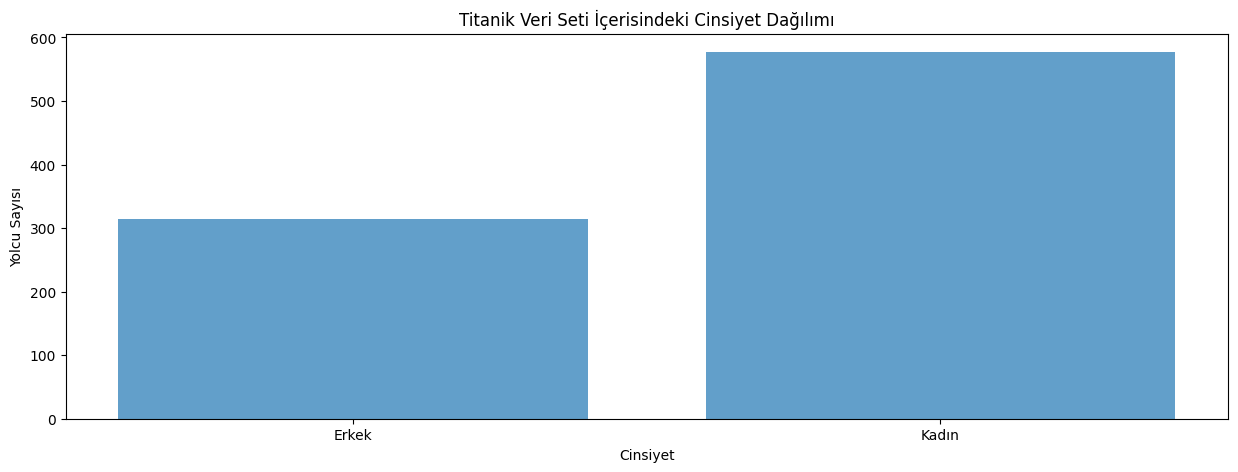

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(veriseti["Sex_encoded"], bins=[-0.5, 0.5, 1.5], rwidth=0.8, alpha=0.7)
plt.xticks([0, 1], labels=["Erkek", "Kadın"])
plt.xlabel("Cinsiyet")
plt.ylabel("Yolcu Sayısı")
plt.title("Titanik Veri Seti İçerisindeki Cinsiyet Dağılımı")
plt.show()

## **4. Sıra Sizde!**

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import numpy as np

# veriseti = pd.read_csv("Titanic.csv")
# veriseti.info()

In [ ]:
veriseti['Embarked'].value_counts()  # C = Cherbourg, Q = Queenstown, S = Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<hr>
<br>

### **1. Uygulama Sorusu**

Aynı `veriseti` içerisindeki **Embarked** sütununu encoding yapınız.

In [ ]:
veriseti.head()  # Değişikliği incelemek için kod bloğunu çalıştırabilirsiniz.

In [ ]:
#@markdown Çözümü görmek için **Kodu göster** butonuna tıklayabilirsiniz.
veriseti["Embarked_encoded"] = labelencoder.fit_transform(veriseti["Embarked"])

<br>
<hr>
<br>

### **2. Uygulama Sorusu**

Gereksiz olarak nitelendirebileceğimiz **Embarked** sütununu `veriseti` içerisinden siliniz.

In [ ]:
veriseti.head()   # Değişikliği incelemek için kod bloğunu çalıştırabilirsiniz.

In [ ]:
#@markdown Çözümü görmek için **Kodu göster** butonuna tıklayabilirsiniz.
veriseti = veriseti.drop('Embarked', axis=1)

<br>
<hr>
<br>

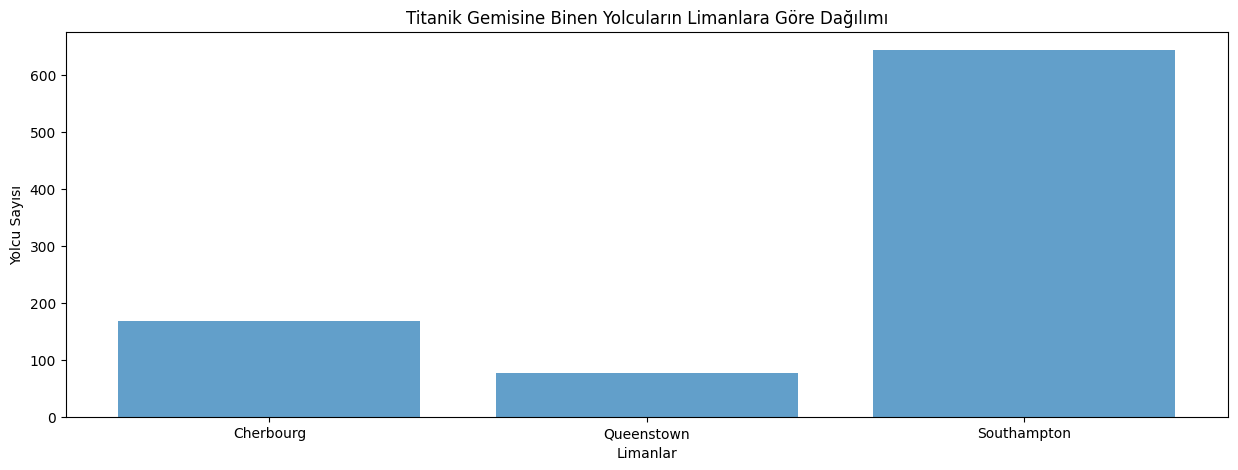

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(veriseti["Embarked_encoded"], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8, alpha=0.7)
plt.xticks([0, 1, 2], labels=["Cherbourg", "Queenstown", "Southampton"])
plt.xlabel("Limanlar")
plt.ylabel("Yolcu Sayısı")
plt.title("Titanik Gemisine Binen Yolcuların Limanlara Göre Dağılımı")
plt.show()